In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

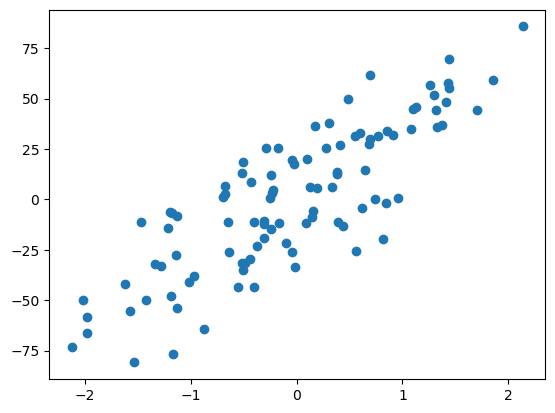

In [15]:
plt.scatter(X,y)

### Training a Regression model Using Sklearn library (which uses OLS(Ordinary Least Square) method)

In [10]:
linreg = LinearRegression()

In [11]:
linreg.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = linreg.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(y_test,y_pred)

0.5901722687225823

In [18]:
linreg.coef_

array([32.35156489])

In [19]:
linreg.intercept_

1.1954507058242432

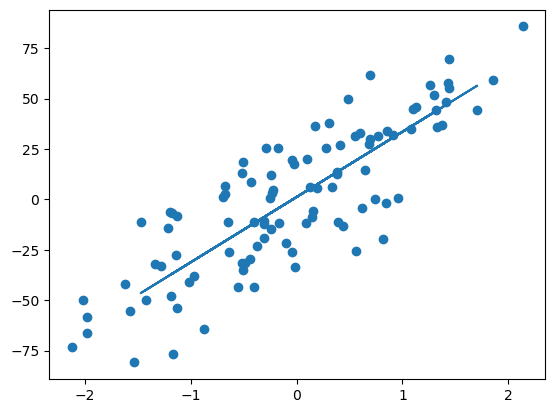

In [17]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.scatter(X,y)

ax1.plot(X_test,y_pred)

In [26]:
mae = np.sum(np.abs(y_test - y_pred)) / (len(y_pred))

In [27]:
mae

16.082517140099267

In [28]:
numerator = 0

In [29]:
for i in range(len(y_test)):
    numerator = numerator + np.abs(y_test[i]-y_pred[i])

mae_forloop = numerator / len(y_pred)
mae_forloop

16.082517140099263

### Writing SLR Algorithim in Gradient Descent Solution

In [60]:
class GDRegressor:
    def __init__(self,epochs,learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.m = -50
        self.b = 99
    
    def fit(self,X_train,y_train):
        for i in range(self.epochs):
            
            '''Finding out the slope at every point in the graph for m & b'''
            slope_b = (-2) * np.sum((y_train - self.m * X_train.ravel() -  self.b))
            slope_m = (-2) * np.sum((y_train - self.m * X_train.ravel() - self.b) * X_train.ravel())
            
            
            '''Updating the b & m values untill we reach to the steepest descent point
            for Minima Error'''
            self.b = self.b - self.learning_rate * slope_b
            self.m = self.m - self.learning_rate * slope_m
            
        print('Intercept', self.b)
        print('weight/slope', self.m)
            
    def predict(self,X_test):
        y = self.m * X_test + self.b
        return y

In [107]:
gdr = GDRegressor(10000,0.01)

In [108]:
gdr.fit(X_train,y_train)

Intercept 1.1954507058242474
weight/slope 32.3515648873527


In [109]:
y_pred_sgd = gdr.predict(X_test)
# y_pred_sgd

In [110]:
r2_score(y_test,y_pred_sgd)

0.5901722687225823

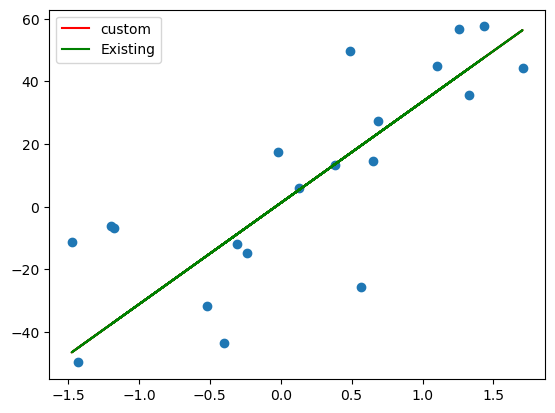

In [111]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.scatter(X_test,y_test)
ax1.plot(X_test,y_pred_sgd, c='red', label='custom')
ax1.plot(X_test,y_pred,c='green', label='Existing')

ax1.legend()